# Scipy 

Scipy est un module mathématique Python extrémement polyvalent. Il contient entre autres les sous-modules suivant:
* Special functions
* Integration
* Optimization
* Interpolation
* Fourier Transforms
* Signal Processing
* Linear Algebra
* Compressed Sparse Graph Routines
* Spatial data structures and algorithms
* Statistics
* Image Processing
* File IO

Aujourd'hui, nous allons étudier 4 sous-modules particuliers, soient:
* Special Functions
* Statistics
* File IO
* Linea Algebra

## Scipy IO
Le premier module que nous étudions est le préliminaire, soit le module entrées-sorties (I/O) scipy.io.  

Ce module est particulièrement utile afin d'ouvrir des fichiers mathématiques provenant  d'autres outils tels que Matlab, Fortan ou NetCDF.  



#### Matlab
La cellule suivante démontre comment sauvegarder un array *numpy* en fichier matlab. Remarquer que nous enregistrons un dictionnaire. En fait, du bord de matlab, les objets sont semblable à des structures ressemblant nos dictionnaires python. Donc, la conversion s'opère implicitement entre les structures matlab et les dictionnaires python dans le module scipy.

In [200]:
from expects import expect, equal
import scipy.io as sio
from scipy import stats
import numpy as np
np.random.seed(22)
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

array = np.arange(100).reshape(10,10)
sio.savemat("matrix.mat", {"matrix": array})


La fonction `whosmat` nous permet d'inspecter le fichier *.mat* avant de l'ouvrir. Ceci peut être utile lors de l'assurance qualité.

In [274]:
sio.whosmat("matrix.mat")

[('matrix', (10, 10), 'int64')]

In [202]:
data = sio.loadmat("matrix.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug  5 17:35:52 2020',
 '__version__': '1.0',
 '__globals__': [],
 'matrix': array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])}

#### Fortran
Les fichiers fortran sont quelque peux plus difficiles à accéder puisqu'il n'y a pas de conformité entre plusieurs versions de Fortran. En plus, dépendant de quelle machine une version Fortran est lancée, le résultat peut diverger!  
Nous pouvons interagir avec des fichiers s'appelant *unformatted sequential files*.

In [203]:
array2 = np.arange(100, 200).reshape(10, 10)

with sio.FortranFile("data.unf", "w") as f:
    f.write_record(array2)


In [204]:
with sio.FortranFile("data.unf", "r") as f:
    data = f.read_record(np.int64)
    print(data)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]


## Scipy Statistics
Nous pouvons accéder aux observations de variables aléatoires à partir du module *numpy*. Voilà un exemple simple:


In [205]:
import numpy as np
obs = np.random.binomial(n=100, p=0.3, size=40)
obs

array([26, 30, 29, 35, 26, 28, 27, 32, 26, 34, 20, 31, 34, 33, 26, 19, 33,
       38, 32, 28, 33, 32, 29, 31, 29, 31, 32, 24, 37, 41, 32, 34, 22, 26,
       35, 33, 30, 25, 30, 30])

En revanche, le module *scipy.statistics* produit la variable aléatoire en soit, et nous permet d'accéder aux observations à l'aide de la méthode 

In [206]:
from scipy.stats import binom, zipf

va = binom(n=100, p=0.3)

In [207]:
print(f"moyenne de la variable aléatoire: {va.mean()}")
print(f"observations générées: {va.rvs(size=40)}")
print(f"mesure d'asymétrie: {va.stats(moments='s')}")

moyenne de la variable aléatoire: 30.0
observations générées: [28 22 29 24 22 32 35 25 25 30 26 34 31 29 40 32 26 26 30 28 36 24 28 26
 33 34 33 26 35 19 28 38 37 21 32 26 31 27 25 30]
mesure d'asymétrie: 0.08728715609439695


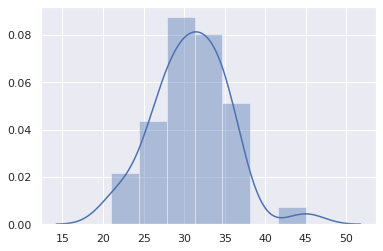

In [208]:
sns.distplot(va.rvs(size=40))

In [209]:
va_zip = zipf(a=2)

In [210]:
print(f"moyenne de la variable aléatoire: {va_zip.mean()}")
print(f"observations générées: {va_zip.rvs(size=40)}")
print(f"mesure d'asymétrie: {va_zip.stats(moments='s')}")

moyenne de la variable aléatoire: inf
observations générées: [ 2  7  2  1  1  1  2  1  1  7  1  6  1 10  1  2  1  1  1  1  2  1  2  7
  1  4  1  3  1  1  1  1  6  1  2  1  4  1  1  1]
mesure d'asymétrie: nan


/home/jackson/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1078: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


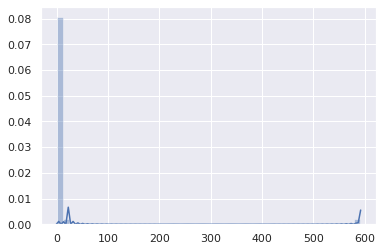

In [211]:
sns.distplot(va_zip.rvs(size=40))

Les distributions de probabilités *sont* regroupées en deux catégories, soit les distributions continues et les distributions discrètes.  
Par exemple, les distributions continues ont les méthodes suivantes:

* rvs: obtenir une série d'observations aléatoires
* pdf: variable aléatoire à densité
* cdf: fonction de répartition
* sf: fonction de survie (1 - CDF)
* ppf: fonction de quantile (inverse de la cdf)
* isf: inverse de la fonction de survie
* stats: information sur les moments


#### Exercice 1
Dans ce premier exercice, veuillez définir une variable aléatoire basée sur une distribution de probabiblité normale avec une déviation standard de 5 et une moyenne de 10.

In [212]:

va_norm = None

expect(va_norm.mean()).to(equal(10.))

AttributeError: 'NoneType' object has no attribute 'mean'

Donc voilà une façon simple de générer des variables aléatoires basées sur des distributions de probabilité. Maintenant, regardons comment utiliser des comparaisons ainsi que des transformations sur ces variables.

Commençons par un exemple simple de ces transformations.

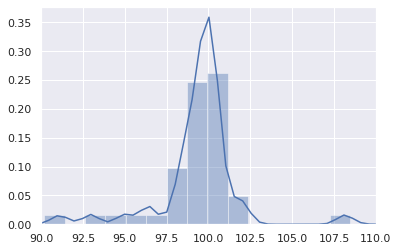

In [213]:
from scipy.stats import cauchy

# générer une distribution cauchy
va_cauchy = cauchy(loc=100)

fig, ax = plt.subplots()
ax.set_xlim([90, 110])
sns.distplot(va_cauchy.rvs(size=50))



Text(0.5, 1.0, 'cauchy dist after boxplot')

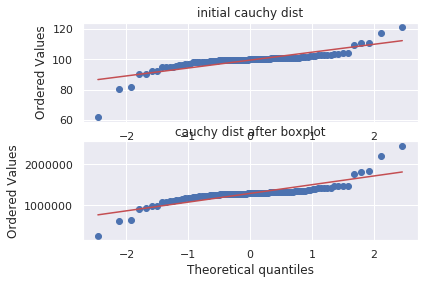

In [214]:
# sommes nous près d'une distribution normale avec notre
# distribution cauchy?

fig = plt.figure()
ax1 = fig.add_subplot(211)
cauch = va_cauchy.rvs(size=100)
prob = stats.probplot(cauch, dist=stats.norm, plot=ax1)
ax1.set_xlabel("")
ax1.set_title("initial cauchy dist")

ax2 = fig.add_subplot(212)
cauch_box, _ = stats.boxcox(cauch)
prob = stats.probplot(cauch_box, dist=stats.norm, plot=ax2)

ax2.set_title("cauchy dist after boxplot")

In [215]:
# nous allons utiliser le test Anderson-Darling afin de voir
# si nous avons presqu'une distribution normale

statistic, crit_value, sign_level = stats.anderson(cauch_box)
statistic, crit_value, sign_level

(8.564345942615489,
 array([0.555, 0.632, 0.759, 0.885, 1.053]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

In [216]:
# comparer avec la distribution avant l'application du box cox
stats.anderson(cauch)

AndersonResult(statistic=9.703551451111167, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### Exercice 2
Réaliser le test d'Anderson-Darling avec votre distribution de probabilité normale générée dans l'exercice 1.


In [ ]:
# exercice 2

Il s'avère que nous pouvons également appliquer la méthode du maximum de vraisemblance afin d'appliquer un jeu de données à une distribution de probabilité. Voici un exemple:


In [257]:
x = va_cauchy.rvs(size=200, random_state=22)
loc, scale= norm.fit(x)
loc, scale

(102.61849646305473, 37.68553559429059)

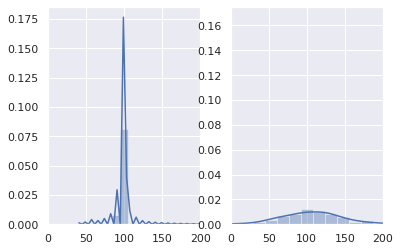

In [260]:
fig, ax = plt.subplots(1,2)

ax[0].set_xlim([0, 0.175])
ax[0].set_xlim([0, 200])
ax[1].set_ylim([0, 0.175])
ax[1].set_xlim([0, 200])

sns.distplot(x, ax=ax[0])
sns.distplot(norm(loc=loc, scale=scale).rvs(size=200, random_state=22), ax=ax[1])

Regardons désormais comment utiliser la fonction pdf et cdf d'une distribution de probabilité.

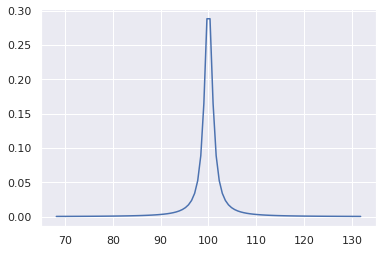

In [267]:
range_ = np.linspace(va_cauchy.ppf(0.01), va_cauchy.ppf(0.99), 100)
sns.lineplot(range_, va_cauchy.pdf(range_))

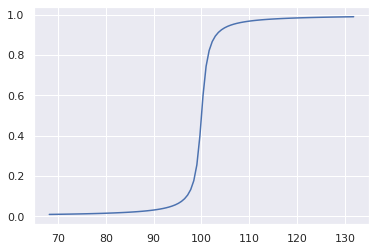

In [268]:
sns.lineplot(range_, va_cauchy.cdf(range_))

## Scipy Special
Nous allons passer seulement quelques minutes sur le module `scipy.special` puisqu'il est assez spécifique et utilisé principalement pour des applications avancées en mathématique et en physique. Le but est principalement de vous renseigner sur ses fonctionnalités.  

Commençons par la partie la plus facile, c'est-à-dire les permutations et combinaisons.

In [217]:
from scipy import special
from scipy.special import comb, perm

numb_comb = comb(12, 3, exact=True, repetition=True)
numb_perm = perm(12, 3, exact=True)

print(f"number of combinations: {numb_comb}, number of permutations: {numb_perm}")

number of combinations: 364, number of permutations: 1320


La liste complète des fonctions disponibles est la suivante:

In [ ]:
# help(special)

In [219]:
# nous pouvons essayer les fonctions d'entropy

x = norm().rvs(size=100)

special.entr(x)

array([       -inf,  0.27637528,        -inf,        -inf,  0.0381282 ,
              -inf,  0.34402984, -0.05475648,        -inf, -0.90744816,
       -0.07001393,        -inf,        -inf,  0.34029987,  0.36114935,
              -inf,        -inf,        -inf,        -inf,  0.34696245,
       -0.88498208, -1.46994006,        -inf,  0.20020509,        -inf,
        0.16740502,        -inf, -0.63000824, -0.10589128,        -inf,
       -0.61544629,        -inf,  0.35483746,  0.23251882,        -inf,
              -inf,  0.35438846,  0.04234237,        -inf, -1.30136413,
        0.1277633 ,        -inf,  0.10874748,        -inf,  0.3018266 ,
        0.16066017,  0.2681033 , -0.97378939,  0.36750685,  0.2759494 ,
              -inf,        -inf,        -inf,  0.34756434,        -inf,
        0.36129338,  0.34240866, -0.26845743,  0.34797786, -0.25238829,
        0.22848602,        -inf,  0.28609035,        -inf, -0.52511286,
              -inf, -0.68249818,        -inf,        -inf,      

In [220]:
# ou les fonctions gamma
special.gamma(x)

array([  -3.54643707,    1.37292304,   -3.77280967,   -5.39104611,
          1.02400254,  -25.66166163,    1.74483982,    0.97188672,
         -4.70103631,    0.90930904,    0.96516251,  -24.01221011,
          4.51473413,    3.87151637,    2.01108421,   -3.82602453,
         -7.2745    ,   -9.16178646,   -4.96022566,    1.77689518,
          0.90656649,    1.02173853,   -4.19005614,   12.18726892,
         -3.55483198,   16.36145143,   -4.49817745,    0.88682572,
          0.95096513,   -3.57113092,    0.8864045 ,   -3.60726764,
          3.28643722,    1.25881438,   -5.19629258,   -3.80528057,
          1.8767255 ,    1.02692065, -126.58686623,    0.9796738 ,
          1.10102786,   -3.70363623,    1.08164279,   -6.611732  ,
          1.46802717,    1.1397973 ,    1.3475671 ,    0.91825913,
          2.53524837,    1.37156237,   -7.54367163,    2.7517813 ,
         -3.60499711,    3.58619058,   -0.95525712,    2.01479602,
          1.72841163,    0.90821448,    1.78879618,    0.91118

## Scipy Linalg
Le module `scipy.linalg` regroupe l'ensemble des fonctionnalités de `numpy.linalg`, mais en contient également davantage.

De plus, le module `scipy.linalg` est compilé avec LAPACK (linear algebra package, Fortran) ce qui le rend généralement plus rapide que numpy qui ne nécessite pas nécessairement ce module de calcul.  

Donc, il est générallement préférable d'utiliser `scipy.linalg`.


Commençons avec une introduction courte sur les matrices et leurs opérations de base. Nous utilisons les *array numpy* pour représenter les matrices.

In [272]:
mat1 = np.array([[1,2], [3,4]])
mat2 = np.array([[5,6], [7,8]])

elementwise = mat1 * mat2
mat_mul = mat1 @ mat2

elementwise, mat_mul

(array([[ 5, 12],
        [21, 32]]),
 array([[19, 22],
        [43, 50]]))

In [273]:
transpose = mat1.T
transpose

array([[1, 3],
       [2, 4]])

#### Exercice 3
Cacluler l'équation matricielle suivante
$$
AB + 2B^2  - I
$$
où
$$
A = \begin{bmatrix} 5 & 7 \\ 8 & 9 \end{bmatrix}
$$
et 
$$
B = \begin{bmatrix} 0 & 1 \\ 2 & 7 \end{bmatrix}
$$

In [ ]:
# exercice 3


La cellule suivante est une initiation au module linalg. 
Nous instancions la matrice suivante
$$
\begin{bmatrix}
10 & 11 & 12 \\
13 & 14 & 15 \\
16 & 17 & 18 \\
\end{bmatrix}
$$
Nous allons déterminer si la matrice est inversible à l'aide de sa 
décomposition en valeur singulière.

Le nombre d'éléments > 0 dans le vecteur de valeur singulière 
renseigne sur le rang de la matrice en question

In [221]:
# nous pouvons utiliser scipy.linalg afin de déterminer l'inverse d'une matrice

from scipy import linalg

mat = np.arange(9).reshape(3,3) + 10

u, s, v = linalg.svd(mat)
np.sum(s > 1e-10)


2

Essayons désormais avec la matrice inversible suivante:
$$
\begin{bmatrix}
1 & 3 & 7 \\
2 & 8 & 3 \\
7 & 8 & 1
\end{bmatrix}
$$

In [222]:
# oups, nous avons une matrice singulière
mat2 = np.array([
    [1,3,7],
    [2,8,3],
    [7,8,1]
])

u, s, v = linalg.svd(mat2)
np.sum(s > 1e-10)

3

In [223]:
# much better
linalg.inv(mat2)

array([[ 0.06694561, -0.22175732,  0.19665272],
       [-0.07949791,  0.20083682, -0.0460251 ],
       [ 0.16736402, -0.05439331, -0.0083682 ]])

In [224]:
# un autre moyen de déterminer si notre matrice est inversible 
# est de calculer le déterminant (!= 0)
d1 = linalg.det(mat)
d2 = linalg.det(mat2)


print(f"le premier déterminant est {d1} et le deuxième {d2}")

le premier déterminant est 0.0 et le deuxième -238.99999999999997


In [227]:
# maintenant, les normes, si nous avons une matrice
# par défaut nous calculons la norme de frobenius.
norm1 = linalg.norm(mat)
norm2 = linalg.norm(mat2)

print(f"première norme: {norm1}, deuxième norme: {norm2}")

première norme: 42.708313008125245, deuxième norme: 15.811388300841896


In [228]:
linalg.pinv(mat)

array([[-1.38888889e+00, -1.66666667e-01,  1.05555556e+00],
       [-5.55555556e-02, -3.05698123e-16,  5.55555556e-02],
       [ 1.27777778e+00,  1.66666667e-01, -9.44444444e-01]])

In [230]:
# eigenvalues and eigenvectors

la, v = linalg.eig(mat)
print(f"our eigenvalues are {la} and eigenvectors are {v}")

our eigenvalues are [ 4.24242853e+01+0.j -4.24285286e-01+0.j -1.87733841e-15+0.j] and eigenvectors are [[-0.44819574 -0.73921067  0.40824829]
 [-0.5688793  -0.03327957 -0.81649658]
 [-0.68956285  0.67265152  0.40824829]]
